# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [1]:
from IPython.display import clear_output

In [3]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [4]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [6]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2022-04-30'
end_date = '2025-04-30'   #'2025-04-30'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'TSLA', 'AVGO', 'GOOG', 'BRK-B',
          'JPM', 'LLY', 'V', 'XOM', 'UNH', 'MA', 'COST', 'WMT', 'HD', 'PG',
          'NFLX', 'JNJ', 'ABBV', 'CRM', 'BAC', 'ORCL', 'MRK', 'CVX', 'WFC', 'KO',
          'CSCO', 'ACN', 'NOW', 'TMO', 'MCD', 'IBM', 'AMD', 'DIS', 'PEP', 'LIN',
          'ABT', 'ISRG', 'PM', 'GE', 'ADBE', 'GS', 'QCOM', 'TXN', 'CAT', 'INTU']

# Get the data
data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
data

[*********************100%***********************]  50 of 50 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2020-04-30   71.205719   66.976074   84.281418  171.929504  353.640015   
2020-05-01   70.059357   67.497536   82.231361  167.194733  343.839996   
2020-05-04   71.050629   66.699036   82.213058  166.674759  349.109985   
2020-05-05   72.116989   69.558968   85.141724  168.615112  356.130005   
2020-05-06   72.861053   69.599693   83.357094  167.463913  362.519989   
...                ...         ...         ...         ...         ...   
2025-04-23  204.332062  177.050003  129.839996  288.160004  351.959991   
2025-04-24  208.097107  180.369995  129.380005  291.410004  360.910004   
2025-04-25  209.005920  186.059998  128.850006  293.390015  367.720001   
2025-04-28  209.864792  192.339996  129.529999  293.250000  368.619995   
2025-04-29  210.933395  193.509995  130.500000  298.470001  370.980011   

Price                                                                 ...  \
Ticker            AMD        AMZN        AVGO        BAC       BRK-B  ...   
Date                                                                  ...   
2020-04-30  52.389999  123.699997   23.907364  21.239510  187.360001  ...   
2020-05-01  49.880001  114.302002   22.858192  20.382868  182.669998  ...   
2020-05-04  52.560001  115.799500   23.083521  20.250393  177.949997  ...   
2020-05-05  52.189999  115.889999   23.313248  20.011946  176.029999  ...   
2020-05-06  52.160000  117.563004   23.252506  19.738171  172.380005  ...   
...               ...         ...         ...        ...         ...  ...   
2025-04-23  90.389999  180.600006  176.910004  38.750000  526.809998  ...   
2025-04-24  94.470001  186.539993  188.149994  39.580002  531.640015  ...   
2025-04-25  96.650002  188.990005  192.309998  39.689999  530.960022  ...   
2025-04-28  96.389999  187.699997  192.470001  39.779999  530.940002  ...   
2025-04-29  96.059998  187.389999  191.169998  39.990002  534.570007  ...   

Price        Volume                                                   \
Ticker           PM      QCOM      TMO       TSLA       TXN      UNH   
Date                                                                   
2020-04-30  9192200  17113500  2215000  427078500   5781000  7631700   
2020-05-01  4782300   9742100  1603100  487977000   5839800  3526100   
2020-05-04  4589800   7202400  1189000  288556500   4987000  2894200   
2020-05-05  3696400   7540800  1139900  254875500   5242400  2501300   
2020-05-06  7199100   8179700  1215600  166848000   3701300  2579200   
...             ...       ...      ...        ...       ...      ...   
2025-04-23  9084500   9073500  3492200  150381900  14125000  8345700   
2025-04-24  8564900   8810600  3662400   94464200  18950400  7629100   
2025-04-25  7755700   5145600  2698300  167560700   8383300  9263800   
2025-04-28  6153300   5743500  2531600  151731800   5170500  6614300   
2025-04-29  5346500   6692000  2437300  108906600   6566500  9909100   

Price                                               
Ticker             V       WFC       WMT       XOM  
Date                                                
2020-04-30  11331600  29506100  40497900  37076300  
2020-05-01  10109600  35197600  31143900  35399300  
2020-05-04   9386200  34343900  17807700  27465600  
2020-05-05  13513000  56753400  19337400  29276200  
2020-05-06   8540500  57732900  17309100  22659000  
...              ...       ...       ...       ...  
2025-04-23   8906000  20678800  18046900  14235700  
2025-04-24   8055200  18420900  13444500   9849600  
2025-04-25   4452800  17775900  15317200  11245800  
2025-04-28   5422900  16694100  12950000  13890900  
2025-04-29   5519500  24563600  12679000   9483100  

[1256 rows x 300 columns]

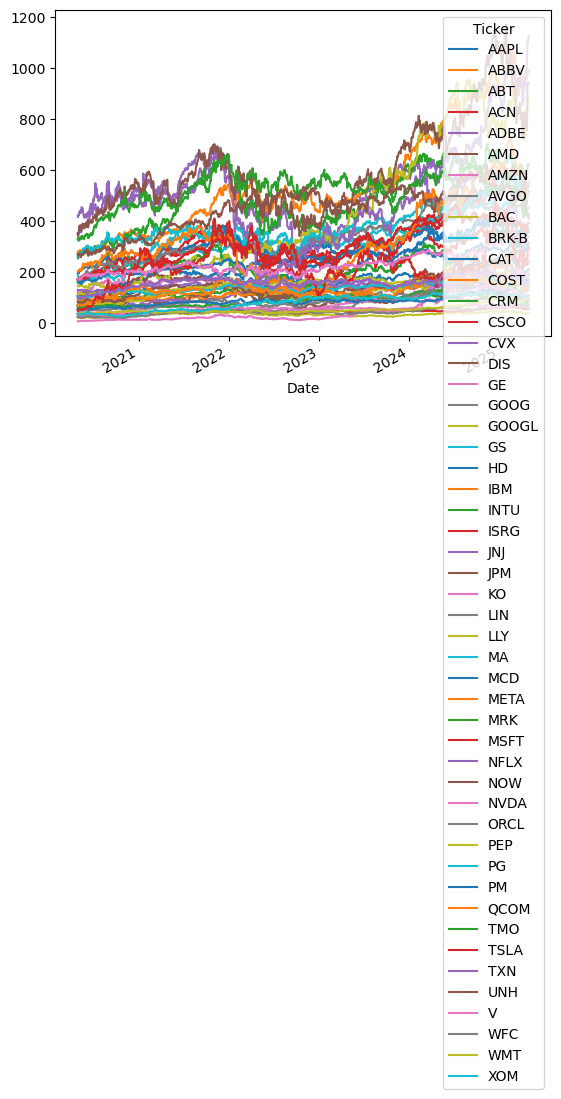

In [7]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [8]:
# Closing price
data = data['Adj Close']
data

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,71.205719,66.976074,84.281418,171.929504,353.640015,52.389999,123.699997,23.907364,21.239510,187.360001,...,57.413322,70.595276,330.662109,52.125332,100.123322,271.762878,172.191330,25.436083,37.561836,36.323383
2020-05-01,70.059357,67.497536,82.231361,167.194733,343.839996,49.880001,114.302002,22.858192,20.382868,182.669998,...,56.397434,67.876297,325.850586,46.754665,95.376663,264.366455,169.156403,24.157721,37.985195,33.720470
2020-05-04,71.050629,66.699036,82.213058,166.674759,349.109985,52.560001,115.799500,23.083521,20.250393,177.949997,...,56.420528,67.912186,322.797607,50.745998,96.063423,267.181946,169.715195,23.947573,38.226238,35.080547
2020-05-05,72.116989,69.558968,85.141724,168.615112,356.130005,52.189999,115.889999,23.313248,20.011946,176.029999,...,55.566254,69.662025,332.282410,51.214001,96.967583,272.292572,171.921524,23.045708,38.544537,35.041473
2020-05-06,72.861053,69.599693,83.357094,167.463913,362.519989,52.160000,117.563004,23.252506,19.738171,172.380005,...,55.027527,70.774742,331.126465,52.172001,97.732590,268.324890,172.249115,22.424034,38.102634,34.384880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,204.332062,177.050003,129.839996,288.160004,351.959991,90.389999,180.600006,176.910004,38.750000,526.809998,...,168.110001,140.460007,431.640015,250.740005,150.862915,427.959991,333.815613,67.569305,94.730957,106.390129
2025-04-24,208.097107,180.369995,129.380005,291.410004,360.910004,94.470001,186.539993,188.149994,39.580002,531.640015,...,170.070007,147.210007,426.660004,259.510010,160.758499,424.250000,335.153381,69.180458,95.608833,107.638626
2025-04-25,209.005920,186.059998,128.850006,293.390015,367.720001,96.650002,188.990005,192.309998,39.689999,530.960022,...,170.240005,148.559998,424.239990,284.950012,161.482330,418.640015,334.614288,69.349541,94.860641,107.579178


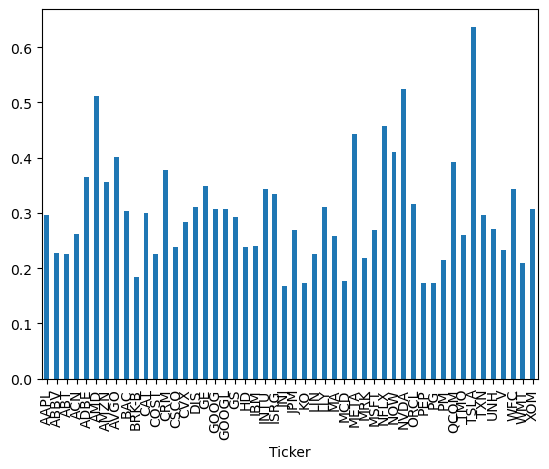

In [9]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()  # Explicitly render the plot

## Process on all dataset


In [11]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000352,0.000046,0.000087,0.000159,0.000237,0.000331,0.000251,2.410916e-04,0.000109,0.000092,...,0.000050,0.000272,0.000132,0.000383,0.000201,0.000063,0.000136,0.000106,0.000077,0.000069
ABBV,0.000046,0.000207,0.000071,0.000053,0.000045,0.000030,0.000032,4.084527e-05,0.000058,0.000054,...,0.000061,0.000044,0.000065,0.000027,0.000057,0.000064,0.000060,0.000064,0.000041,0.000065
ABT,0.000087,0.000071,0.000205,0.000101,0.000111,0.000110,0.000091,7.565286e-05,0.000067,0.000063,...,0.000056,0.000103,0.000131,0.000096,0.000087,0.000061,0.000087,0.000061,0.000042,0.000030
ACN,0.000159,0.000053,0.000101,0.000273,0.000198,0.000226,0.000180,1.793060e-04,0.000126,0.000099,...,0.000054,0.000187,0.000129,0.000212,0.000161,0.000077,0.000134,0.000132,0.000060,0.000077
ADBE,0.000237,0.000045,0.000111,0.000198,0.000532,0.000383,0.000301,2.810386e-04,0.000085,0.000075,...,0.000035,0.000283,0.000162,0.000365,0.000205,0.000059,0.000154,0.000087,0.000065,0.000035
AMD,0.000331,0.000030,0.000110,0.000226,0.000383,0.001050,0.000402,4.787947e-04,0.000161,0.000105,...,0.000026,0.000503,0.000205,0.000600,0.000362,0.000071,0.000183,0.000166,0.000075,0.000076
AMZN,0.000251,0.000032,0.000091,0.000180,0.000301,0.000402,0.000506,2.895885e-04,0.000123,0.000086,...,0.000025,0.000291,0.000148,0.000421,0.000209,0.000048,0.000140,0.000122,0.000081,0.000046
AVGO,0.000241,0.000041,0.000076,0.000179,0.000281,0.000479,0.000290,6.449752e-04,0.000140,0.000087,...,0.000030,0.000410,0.000144,0.000455,0.000290,0.000055,0.000142,0.000153,0.000063,0.000076
BAC,0.000109,0.000058,0.000067,0.000126,0.000085,0.000161,0.000123,1.402180e-04,0.000370,0.000151,...,0.000089,0.000166,0.000074,0.000208,0.000150,0.000076,0.000133,0.000351,0.000050,0.000190


In [12]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


Ticker
AAPL     0.144785
ABBV     0.171995
ABT      0.066874
ACN      0.093992
ADBE     0.015946
AMD      0.181952
AMZN     0.126898
AVGO     0.481199
BAC      0.112059
BRK-B    0.185496
CAT      0.141239
COST     0.259500
CRM      0.145628
CSCO     0.103519
CVX      0.179200
DIS     -0.095671
GE       0.359469
GOOG     0.212281
GOOGL    0.210481
GS       0.208027
HD       0.116342
IBM      0.196065
INTU     0.187091
ISRG     0.172221
JNJ      0.025386
JPM      0.186453
KO       0.086978
LIN      0.135632
LLY      0.418809
MA       0.097768
MCD      0.105221
META     0.427742
MRK      0.063629
MSFT     0.178487
NFLX     0.269656
NOW      0.197391
NVDA     0.933348
ORCL     0.216350
PEP      0.011112
PG       0.059705
PM       0.216570
QCOM     0.046366
TMO      0.006853
TSLA     0.242565
TXN      0.027185
UNH      0.063537
V        0.106301
WFC      0.240724
WMT      0.189941
XOM      0.303240
dtype: float64

In [13]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL     0.296558
ABBV     0.227219
ABT      0.226599
ACN      0.261306
ADBE     0.364814
AMD      0.512243
AMZN     0.355506
AVGO     0.401552
BAC      0.303960
BRK-B    0.183600
CAT      0.300475
COST     0.225674
CRM      0.377364
CSCO     0.238365
CVX      0.283749
DIS      0.310526
GE       0.349237
GOOG     0.306756
GOOGL    0.307538
GS       0.291890
HD       0.238120
IBM      0.241103
INTU     0.343772
ISRG     0.333831
JNJ      0.167064
JPM      0.270027
KO       0.172553
LIN      0.225078
LLY      0.310419
MA       0.258774
MCD      0.176318
META     0.442769
MRK      0.218478
MSFT     0.268719
NFLX     0.458095
NOW      0.411206
NVDA     0.525115
ORCL     0.316686
PEP      0.173317
PG       0.173409
PM       0.214101
QCOM     0.391800
TMO      0.259639
TSLA     0.637065
TXN      0.295914
UNH      0.270264
V        0.233027
WFC      0.343966
WMT      0.210101
XOM      0.306719
dtype: float64

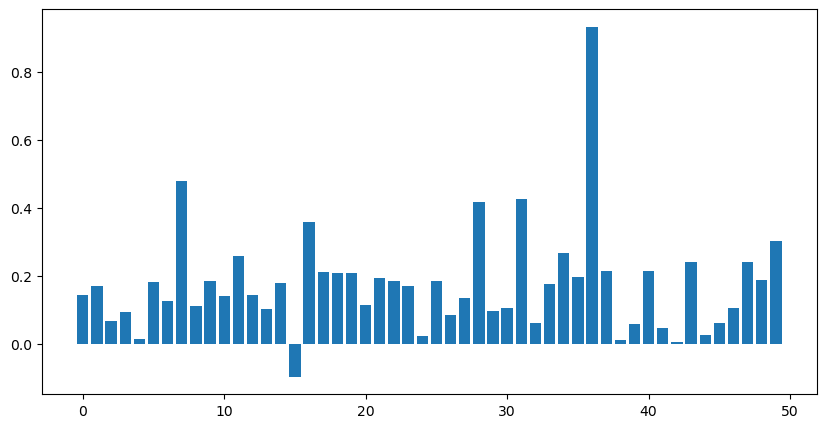

DONE


In [14]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## For finetuning the parameter of XO and sampling

### Test data

In [97]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2020-04-30'
end_date = '2024-04-30'   #'2024-04-30'

ticker = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'TSLA', 'AVGO', 'GOOG', 'BRK-B',
          'JPM', 'LLY', 'V', 'XOM', 'UNH', 'MA', 'COST', 'WMT', 'HD', 'PG',
          'NFLX', 'JNJ', 'ABBV', 'CRM', 'BAC', 'ORCL', 'MRK', 'CVX', 'WFC', 'KO',
          'CSCO', 'ACN', 'NOW', 'TMO', 'MCD', 'IBM', 'AMD', 'DIS', 'PEP', 'LIN',
          'ABT', 'ISRG', 'PM', 'GE', 'ADBE', 'GS', 'QCOM', 'TXN', 'CAT', 'INTU']

# Get the data
fine_tune_data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
fine_tune_data

[*********************100%***********************]  50 of 50 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2020-04-30   71.205719   66.976051   84.281410  171.929474  353.640015   
2020-05-01   70.059349   67.497536   82.231377  167.194672  343.839996   
2020-05-04   71.050613   66.699043   82.213074  166.674789  349.109985   
2020-05-05   72.117004   69.558968   85.141731  168.615128  356.130005   
2020-05-06   72.861053   69.599693   83.357079  167.463943  362.519989   
...                ...         ...         ...         ...         ...   
2024-04-23  165.898056  163.596924  105.475540  311.294678  472.899994   
2024-04-24  168.005356  161.917938  104.789299  308.062164  477.119995   
2024-04-25  168.870132  161.425781  104.759895  303.601471  473.440002   
2024-04-26  168.283676  154.024673  105.416725  302.628784  477.559998   
2024-04-29  172.458450  155.858063  105.161827  297.863495  473.070007   

Price                                                                  ...  \
Ticker             AMD        AMZN        AVGO        BAC       BRK-B  ...   
Date                                                                   ...   
2020-04-30   52.389999  123.699997   23.907368  21.239513  187.360001  ...   
2020-05-01   49.880001  114.302002   22.858198  20.382868  182.669998  ...   
2020-05-04   52.560001  115.799500   23.083521  20.250395  177.949997  ...   
2020-05-05   52.189999  115.889999   23.313244  20.011951  176.029999  ...   
2020-05-06   52.160000  117.563004   23.252512  19.738173  172.380005  ...   
...                ...         ...         ...        ...         ...  ...   
2024-04-23  152.270004  179.539993  123.410286  37.445095  408.739990  ...   
2024-04-24  151.740005  176.589996  124.164078  37.396297  405.950012  ...   
2024-04-25  153.759995  173.669998  127.878654  36.996181  404.910004  ...   
2024-04-26  157.399994  179.619995  132.783676  36.918114  402.100006  ...   
2024-04-29  160.199997  180.960007  132.245270  36.644859  400.959991  ...   

Price         Volume                                                   \
Ticker            PM      QCOM      TMO       TSLA       TXN      UNH   
Date                                                                    
2020-04-30   9192200  17113500  2215000  427078500   5781000  7631700   
2020-05-01   4782300   9742100  1603100  487977000   5839800  3526100   
2020-05-04   4589800   7202400  1189000  288556500   4987000  2894200   
2020-05-05   3696400   7540800  1139900  254875500   5242400  2501300   
2020-05-06   7199100   8179700  1215600  166848000   3701300  2579200   
...              ...       ...      ...        ...       ...      ...   
2024-04-23  13105500   6616700  2544000  124545100   6833600  3646700   
2024-04-24  13572400   6130500  2034900  181178000  13965900  3724400   
2024-04-25   7417700   6230700  1184000  126427500   9130800  4329700   
2024-04-26   5391000   7141300  1438200  109815700   5401900  2727000   
2024-04-29   3510700   6623900   953800  243869700   4191500  2192100   

Price                                               
Ticker             V       WFC       WMT       XOM  
Date                                                
2020-04-30  11331600  29506100  40497900  37076300  
2020-05-01  10109600  35197600  31143900  35399300  
2020-05-04   9386200  34343900  17807700  27465600  
2020-05-05  13513000  56753400  19337400  29276200  
2020-05-06   8540500  57732900  17309100  22659000  
...              ...       ...       ...       ...  
2024-04-23   6438000  21731200  17963900  13929800  
2024-04-24   8807200  19731600  18529100  12101200  
2024-04-25   8064600  24002500  19263000  16041000  
2024-04-26   6840600  18785900  11045200  27289500  
2024-04-29   4128600  15338400   9785100  17309900  

[1006 rows x 300 columns]

In [99]:
fine_tune_data = fine_tune_data['Adj Close']
fine_tune_data

import numpy as np
# Log of percentage change
cov_matrix = fine_tune_data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

# Yearly returns for individual companies
ind_er = fine_tune_data.resample('YE').last().pct_change().mean()
ind_er

mu = np.array(ind_er)
cov = np.array(cov_matrix)

### Run the experiment

In [102]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

class PortfolioProblem(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [104]:
class PortfolioRepair(Repair):
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [116]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.sampling.rnd import FloatRandomSampling, BinaryRandomSampling
from pymoo.operators.sampling.lhs import LHS
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV

# Define configurations combining sampling and crossover operators
configurations = [
    {'name': 'BinaryRandom_SBX',   'sampling': BinaryRandomSampling(), 'crossover': SBX()},
    {'name': 'BinaryRandom_TwoPt', 'sampling': BinaryRandomSampling(), 'crossover': TwoPointCrossover()},
    {'name': 'BinaryRandom_Uniform','sampling': BinaryRandomSampling(), 'crossover': UniformCrossover()},

    {'name': 'FloatRandom_SBX',    'sampling': FloatRandomSampling(),  'crossover': SBX()},
    {'name': 'FloatRandom_TwoPt',  'sampling': FloatRandomSampling(),  'crossover': TwoPointCrossover()},
    {'name': 'FloatRandom_Uniform','sampling': FloatRandomSampling(),  'crossover': UniformCrossover()},

    {'name': 'LHS_SBX',            'sampling': LHS(),               'crossover': SBX()},
    {'name': 'LHS_TwoPt',          'sampling': LHS(),               'crossover': TwoPointCrossover()},
    {'name': 'LHS_Uniform',        'sampling': LHS(),               'crossover': UniformCrossover()},
]

In [118]:
import matplotlib.pyplot as plt

def calculate_HV(F):
    """Calculate hypervolume of the front F against a fixed reference point."""
    ref_point = np.array([0.5, -0.1])
    ind = HV(ref_point=ref_point)

    # plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    # plt.scatter(ref_point[0], ref_point[1], facecolor="none", edgecolors="green", alpha=0.5, label="reference point")
    # plt.legend()
    # plt.xlabel("expected volatility")
    # plt.ylabel("expected return")
    # plt.show()
   
    return ind(F)

In [124]:
# Number of independent runs
test_time = 20
# Prepare storage for HV results
test_results = {conf['name']: {'500': [], '600': []} for conf in configurations}

for run_idx in range(test_time):
    # Assuming these functions are defined elsewhere:    
    problem = PortfolioProblem(mu, cov)    

    for config in configurations:
        # Build the NSGA2 algorithm with chosen operators
        algorithm = NSGA2(
            pop_size=200,
            sampling=config['sampling'],
            crossover=config['crossover'],
            repair=PortfolioRepair()
        )

        # 500 generations
        print(f"Run {run_idx+1}/{test_time} - {config['name']} - 500 gens")
        res_500 = minimize(
            problem,
            algorithm,
            termination=('n_gen', 500),
            seed=run_idx,
            verbose=False
        )

        X, F, sharpe = res_500.opt.get("X", "F", "sharpe")
        # F = F * [1, -1]  # Adjust for minimization/maximization
    
        hv_500 = calculate_HV(F)
        test_results[config['name']]['500'].append(hv_500)
        print(f"  Hypervolume@500: {hv_500:.6f}")

        # 600 generations (reuse same algorithm instance or rebuild)
        print(f"Run {run_idx+1}/{test_time} - {config['name']} - 600 gens")
        res_600 = minimize(
            problem,
            algorithm,
            termination=('n_gen', 600),
            seed=run_idx,
            verbose=False
        )
        
        X, F, sharpe = res_600.opt.get("X", "F", "sharpe")
        # F = F * [1, -1]  # Adjust for minimization/maximization    
        
        hv_600 = calculate_HV(F)
        test_results[config['name']]['600'].append(hv_600)
        print(f"  Hypervolume@600: {hv_600:.6f}\n")

# After all runs, you can summarize results
def summarize_results(results_dict):
    summary = {}
    for name, gens in results_dict.items():
        summary[name] = {
            'mean_HV_500': np.mean(gens['500']),
            'std_HV_500': np.std(gens['500']),
            'mean_HV_600': np.mean(gens['600']),
            'std_HV_600': np.std(gens['600'])
        }
    return summary

if __name__ == '__main__':
    summary = summarize_results(test_results)
    for name, stats in summary.items():
        print(f"{name}: 500 gens -> mean {stats['mean_HV_500']:.6f}, std {stats['std_HV_500']:.6f}; \
              600 gens -> mean {stats['mean_HV_600']:.6f}, std {stats['std_HV_600']:.6f}")

Run 1/20 - BinaryRandom_SBX - 500 gens
  Hypervolume@500: 0.219810
Run 1/20 - BinaryRandom_SBX - 600 gens
  Hypervolume@600: 0.219740

Run 1/20 - BinaryRandom_TwoPt - 500 gens
  Hypervolume@500: 0.219880
Run 1/20 - BinaryRandom_TwoPt - 600 gens
  Hypervolume@600: 0.219761

Run 1/20 - BinaryRandom_Uniform - 500 gens
  Hypervolume@500: 0.219888
Run 1/20 - BinaryRandom_Uniform - 600 gens
  Hypervolume@600: 0.219901

Run 1/20 - FloatRandom_SBX - 500 gens
  Hypervolume@500: 0.219745
Run 1/20 - FloatRandom_SBX - 600 gens
  Hypervolume@600: 0.219854

Run 1/20 - FloatRandom_TwoPt - 500 gens
  Hypervolume@500: 0.219675
Run 1/20 - FloatRandom_TwoPt - 600 gens
  Hypervolume@600: 0.219763

Run 1/20 - FloatRandom_Uniform - 500 gens
  Hypervolume@500: 0.219509
Run 1/20 - FloatRandom_Uniform - 600 gens
  Hypervolume@600: 0.219875

Run 1/20 - LHS_SBX - 500 gens
  Hypervolume@500: 0.219844
Run 1/20 - LHS_SBX - 600 gens
  Hypervolume@600: 0.219705

Run 1/20 - LHS_TwoPt - 500 gens
  Hypervolume@500: 0.21

## Solve problem with NSGA_II

In [ ]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, returns_df, risk_free_rate=0.02, VaR_confidence = 0.95, hhi_limit=0.15, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.returns_df = returns_df
        self.risk_free_rate = risk_free_rate
        self.VaR_confidence = VaR_confidence
        self.hhi_limit = hhi_limit        
        self.DAYS_PER_YEAR = 250
        self.z_alpha = norm.ppf(self.VaR_confidence)

    def _evaluate(self, x, out, *args, **kwargs):
        x = np.asarray(x).flatten()
        
        exp_return = x @ self.mu
        volatility_daily = np.sqrt(x @ self.cov @ x)
        volatility_annual = volatility_daily * np.sqrt(self.DAYS_PER_YEAR)
        exp_return_annual = exp_return * self.DAYS_PER_YEAR

        # sharp ratio
        sharpe = (exp_return - self.risk_free_rate) / volatility_annual

        port_daily_ret = self.returns_df @ x #每日報酬
        
        '''
        # --- Calmar ratio ---
        
        # 若沒有回測區間太短會失敗，使用者自行確認 returns_df 的長度
        cum = np.cumprod(1 + port_daily_ret)
        running_max = np.maximum.accumulate(cum)
        running_max[running_max == 0] = 1e-6
        drawdowns = (running_max - cum) / running_max
        max_dd = drawdowns.max() if len(drawdowns) else 0.0
        calmar = np.inf if max_dd == 0 else exp_return_annual / max_dd
        '''
        
        # --- Herfindahl–Hirschman Index (HHI) 作多元化 ---
        hhi = np.sum(np.square(x))          # ∑ w_i²，1 = 全押單一資產
        diversity = 1 - hhi                 # 值愈大愈分散
        
        # --- Value at Risk ---
        var = -np.percentile(port_daily_ret, (1 - self.VaR_confidence) * 100)
        
        
        
        out["F"] = [volatility_annual, -exp_return]
        out["sharpe"] = sharpe
        # out["calmar"] = calmar
        out["diversity"] = diversity
        out["var"] = var

In [18]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

## Needed function for running on the test data 

In [23]:
from pymoo.indicators.hv import HV
from scipy.stats import norm

def calculate_expected_returns(current_data):
    ind_er = current_data.resample('Y').last().pct_change().mean()
    # print(ind_er)
    return ind_er

def calculate_covariance_matrix(current_data):
    cov_matrix = current_data.pct_change().apply(lambda x: np.log(1+x)).cov()
    # print(cov_matrix)
    return cov_matrix

def calculate_returns_df_matrix(current_data):
    returns_df = current_data.pct_change().dropna()
    return returns_df

def record_stock_price(stock_alloc, current_budget, price_day, budget_history, stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'record stock price is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')
    print(f'Stock allocation: {stock_alloc}')    
    
    current_budget = stock_alloc @ prices_array  
    
    budget_history.append(current_budget)
    stock_alloc_history.append(stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {current_budget}')  
        
def execute_trades(stock_alloc, final_weight, current_budget, price_day, budget_history, stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {stock_alloc}')

    
    if not np.allclose(stock_alloc, np.zeros(len(ticker))):
        current_budget = stock_alloc @ prices_array
    
    
    
    dollar_alloc = current_budget*final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {stock_alloc}')

    budget_history.append(current_budget)
    stock_alloc_history.append(stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {current_budget}')

'''
def calculate_HV(F):
    ref_point = np.array([0.35, 0.35])

    ind = HV(ref_point=ref_point)
    print("HV", ind(F))
    return ind(F)
'''
    

Current day is: 0


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


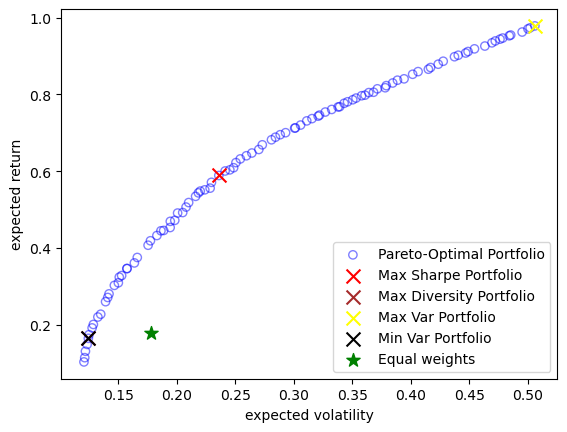

you are doing sharpe
trade data is 2024-04-30 00:00:00
Prices: [169.30747986 156.93881226 103.88739014 295.65280151 462.82998657
 158.38000488 175.         128.45658875  36.11787415 396.73001099
 329.22213745 719.18170166 267.37545776  45.6102562  152.72155762
 110.10192108 160.74621582 163.86387634 162.00547791 417.49996948
 326.11108398 159.72970581 621.58728027 370.61999512 140.09562683
 187.39396667  59.97619629 435.48205566 774.47033691 448.56079102
 266.55755615 428.60638428 125.50038147 385.67208862 550.64001465
 693.33001709  86.37361908 112.49365234 170.24714661 159.3056488
  90.86070251 162.59208679 567.07025146 183.27999878 170.16557312
 476.08633423 266.17877197  57.59651184  58.54407883 113.36417389]
Stock allocation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Stock allocation (shares): [   0.            0.            0.            0.            0.
    0.         

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


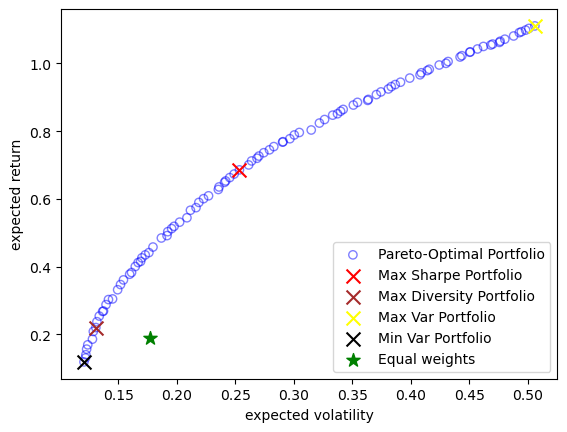

you are doing sharpe
trade data is 2024-05-29 00:00:00
Prices: [189.40422058 149.36398315  98.75036621 288.63754272 477.6000061
 165.13999939 182.02000427 137.3874054   37.78665543 404.08999634
 332.70556641 802.37164307 270.03982544  44.73649597 150.08357239
  99.97373199 162.5144043  176.56370544 175.06303406 447.30252075
 318.00271606 162.14035034 594.42352295 398.3999939  141.08155823
 193.61958313  59.90822983 420.88565063 806.01361084 439.88189697
 243.44949341 472.63571167 122.27594757 425.90460205 654.61999512
 731.11999512 114.78727722 122.37332916 165.64038086 157.79263306
  95.32047272 204.16897583 565.65435791 176.19000244 189.3550415
 477.09024048 266.91955566  57.37101746  64.26010895 109.80130768]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.  

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


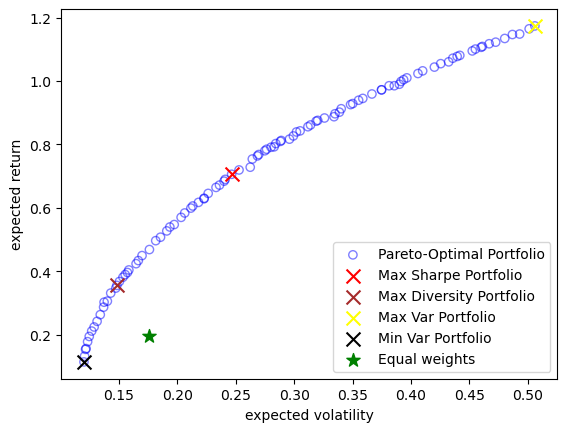

you are doing sharpe
trade data is 2024-06-27 00:00:00
Prices: [213.10339355 163.06622314 102.59332275 297.89300537 546.76000977
 159.47000122 197.8500061  157.24743652  38.53684616 407.95001221
 322.22579956 846.24468994 251.37905884  46.06655121 149.52877808
 101.25215149 159.43496704 186.19075012 184.73957825 438.97503662
 335.52102661 165.8286438  647.24084473 445.10998535 142.40992737
 194.6555481   62.53554916 436.14706421 902.86071777 440.1602478
 253.67695618 518.1854248  126.83739471 449.40441895 684.34002686
 774.13000488 123.95944977 138.63174438 162.17655945 162.64401245
  98.47077179 192.10055542 549.55664062 197.41999817 187.91723633
 480.81430054 264.66598511  56.07223129  67.19001007 111.02851105]
Stock allocation: [   0.           24.18686256    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           69.92695501    0.            0.            0.
    0. 

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


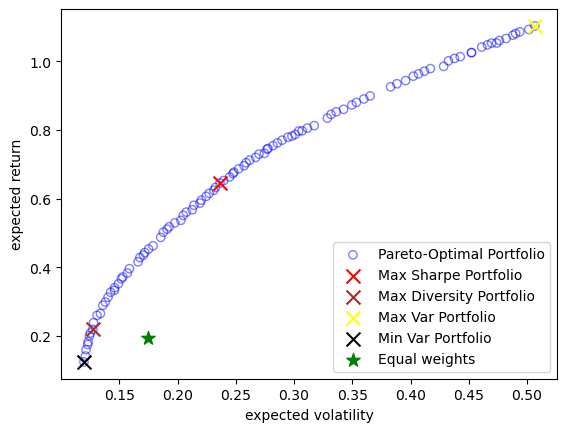

you are doing sharpe
trade data is 2024-07-26 00:00:00
Prices: [216.94541931 180.3106842  103.71907806 324.13677979 542.44000244
 139.99000549 182.5        150.27433777  40.91287613 437.66000366
 346.28240967 814.55255127 261.58822632  46.88225174 150.98274231
  89.53327179 168.96870422 168.07585144 166.39613342 491.21380615
 353.22607422 186.11439514 630.14929199 441.29998779 156.90487671
 208.57868958  65.6080246  447.21374512 799.1505127  436.26220703
 247.61430359 464.46798706 122.38215637 422.03427124 631.36999512
 827.60998535 113.03213501 137.86280823 168.50717163 166.06742859
 109.90102386 177.23652649 605.79138184 219.80000305 196.23327637
 563.13116455 257.58746338  58.97251892  69.07071686 113.37663269]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.          153.80524359
    0.            0.            0.            0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


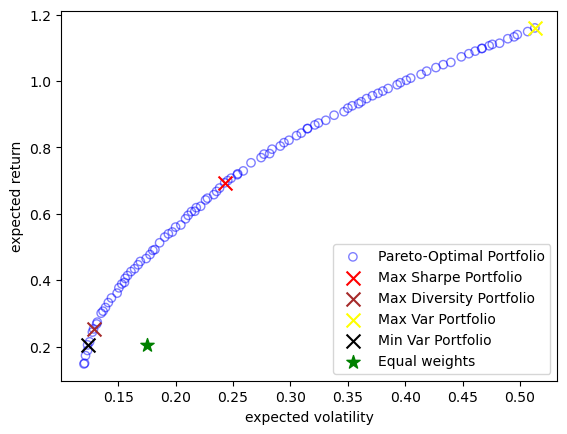

you are doing sharpe
trade data is 2024-08-23 00:00:00
Prices: [226.04542542 192.37620544 111.06142426 328.88345337 558.29998779
 154.97999573 177.03999329 164.87263489  39.04739761 453.38000488
 344.23718262 875.9329834  262.8727417   49.68265915 142.78710938
  90.16049194 170.37171936 166.83033752 165.02111816 501.44107056
 369.02502441 192.00126648 616.70782471 486.54998779 160.31375122
 214.54397583  68.28909302 461.43096924 947.5859375  464.39852905
 284.48129272 526.60308838 113.92111969 414.36431885 686.72998047
 828.27001953 129.33811951 138.04133606 171.55053711 166.12634277
 116.48384094 170.78886414 604.77368164 220.32000732 205.22579956
 577.75018311 266.04226685  55.79211807  75.144104   113.30558777]
Stock allocation: [   0.          467.21721658    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


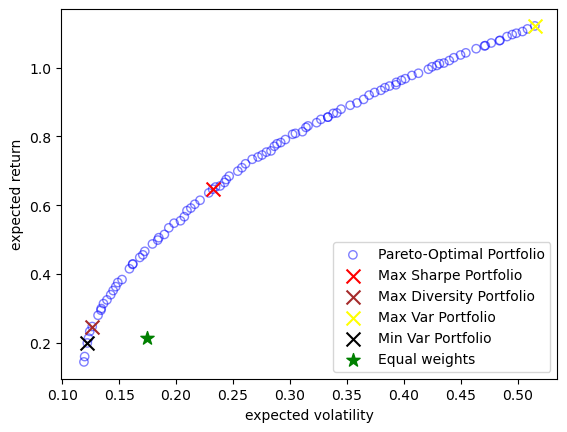

you are doing sharpe
trade data is 2024-09-23 00:00:00
Prices: [225.67671204 188.75363159 113.15077209 334.74526978 527.86999512
 156.75       193.88000488 171.95753479  39.40079498 454.98001099
 366.72460938 913.66174316 263.49484253  51.10243607 142.70973206
  92.55986023 187.73527527 162.69985962 161.47874451 492.51574707
 387.44796753 215.89128113 638.71563721 489.07000732 160.63494873
 207.79249573  70.66855621 474.33428955 913.55102539 494.96420288
 295.56524658 563.45379639 113.72924805 430.98703003 705.36999512
 925.54998779 116.24130249 164.58049011 169.16127014 170.64360046
 117.39515686 164.2109375  609.38122559 250.         199.32952881
 568.78826904 287.12155151  54.22757721  79.74011993 114.31863403]
Stock allocation: [   0.          263.39746689    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


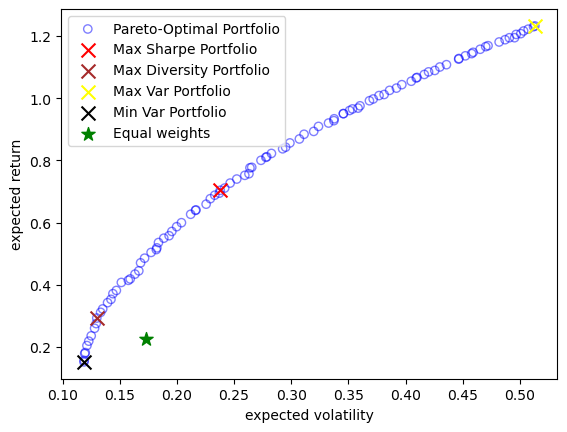

you are doing sharpe
trade data is 2024-10-21 00:00:00
Prices: [235.6516571  183.10514832 115.84266663 372.59112549 497.70999146
 157.8999939  189.07000732 178.96748352  41.26855087 464.16000366
 387.18945312 883.46478271 290.50158691  55.83421707 145.94039917
  96.19376373 193.55397034 165.42366028 163.69366455 512.70507812
 401.72174072 226.90614319 611.8414917  518.85998535 160.25112915
 220.49606323  68.42228699 480.29623413 901.22808838 513.43774414
 311.21026611 574.18560791 104.59194946 416.34274292 772.07000732
 918.34002686 143.68688965 172.71353149 172.01156616 167.46856689
 116.62393951 167.22879028 594.42504883 218.8500061  191.42871094
 566.8638916  285.35083008  62.99490738  80.21659088 116.96815491]
Stock allocation: [   0.           13.87610146    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            8.22648565    0.            0.            0.
    0.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


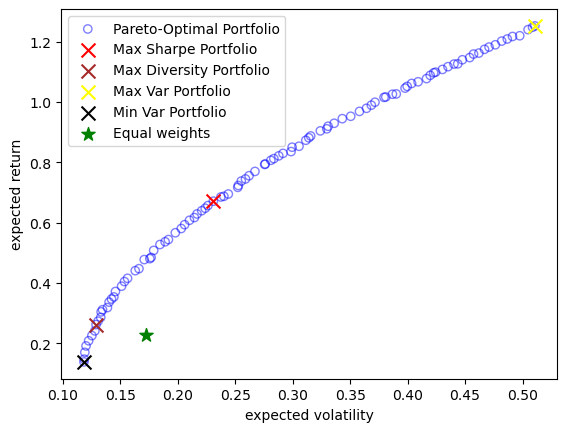

you are doing sharpe
trade data is 2024-11-18 00:00:00
Prices: [ 227.47128296  163.21821594  116.20904541  349.56365967  499.51000977
  138.92999268  201.69999695  164.72883606   46.17018509  472.20001221
  381.22015381  917.29998779  321.37774658   56.54460144  157.08314514
  113.03911591  176.90214539  176.3986969   174.89790344  582.20446777
  405.71524048  205.34635925  676.50079346  531.64001465  152.31878662
  242.27868652   60.94460678  445.72677612  724.46386719  520.03747559
  287.69827271  553.46081543   94.97272491  413.34033203  847.04998779
 1005.34002686  140.12744141  184.61143494  155.61735535  168.66378784
  129.13337708  162.7663269   500.49438477  338.73999023  203.91943359
  584.89746094  311.118927     73.3237381    83.46257782  118.15517426]
Stock allocation: [   0.          599.98486242    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            7.94273387    0.            0.            0.
    0.          412

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


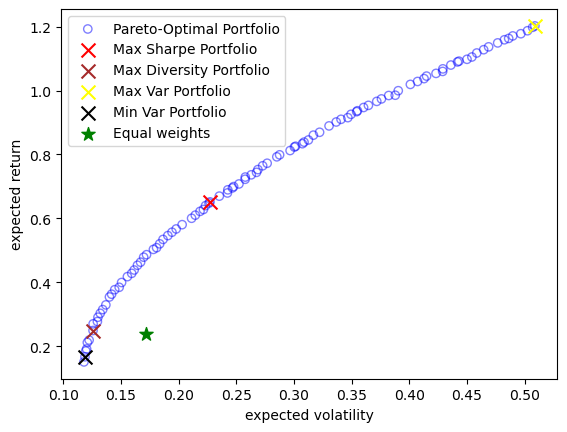

you are doing sharpe
trade data is 2024-12-17 00:00:00
Prices: [ 252.86999512  172.15065002  112.17895508  354.03240967  455.23001099
  125.01999664  231.1499939   238.86526489   44.76748657  455.66000366
  372.63311768  979.71960449  350.02001953   57.73843765  144.72247314
  113.01999664  165.22293091  196.89567566  195.19519043  571.84442139
  405.89416504  225.95106506  675.46435547  545.15997314  145.24734497
  235.68357849   62.93556595  428.76974487  775.69042969  529.38885498
  294.38031006  618.8894043    99.20298004  452.7194519   919.13000488
 1114.7199707   130.37800598  168.68792725  154.77159119  168.24891663
  123.56491852  157.07305908  528.39318848  479.85998535  185.15940857
  483.45385742  317.23843384   70.07765961   94.92916107  106.0754776 ]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


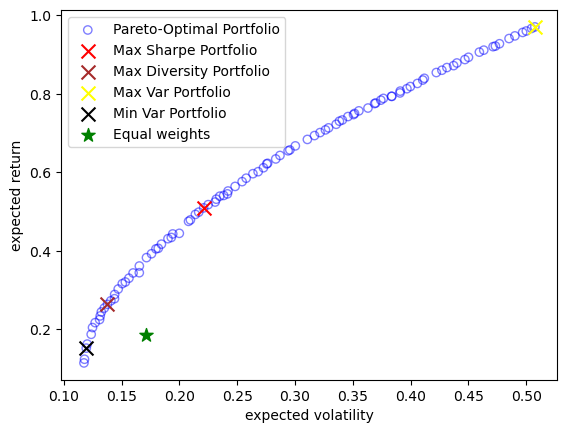

you are doing sharpe
trade data is 2025-01-17 00:00:00
Prices: [ 229.42655945  169.98904419  112.95676422  350.85021973  429.98999023
  121.45999908  225.94000244  236.72369385   46.23820496  467.95001221
  382.76699829  940.92303467  324.05084229   59.83054352  157.77690125
  107.01999664  182.51043701  197.32519531  195.77452087  622.85150146
  406.7984314   221.82617188  603.07666016  592.64001465  145.86242676
  257.57348633   62.25061798  434.55044556  722.98944092  523.86907959
  279.33718872  612.2253418    97.08130646  427.38684082  858.09997559
 1071.47998047  137.69734192  160.45361328  146.95074463  159.16131592
  120.52610779  163.67744446  559.17712402  426.5         189.39173889
  507.59072876  318.55404663   76.28282166   91.46707153  110.30827332]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


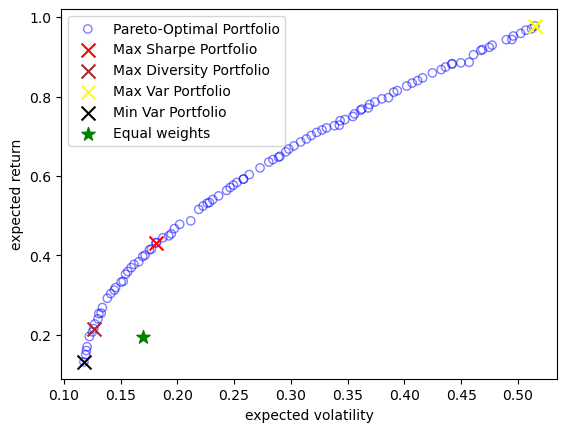

you are doing sharpe
trade data is 2025-02-18 00:00:00
Prices: [ 244.14984131  194.45295715  129.57975769  385.64764404  464.10998535
  114.27999878  226.6499939   227.84056091   46.23820496  482.82000732
  352.30368042 1054.65588379  328.44390869   64.16162872  154.2808075
  109.55999756  209.68986511  185.58856201  183.55859375  668.87329102
  400.76669312  261.33099365  578.92883301  600.89001465  154.99000549
  278.23620605   68.54418182  464.28125     855.4465332   567.70953369
  303.08007812  715.73321533   82.57661438  408.07110596 1035.84997559
  997.47998047  139.38717651  179.15643311  142.83711243  164.40519714
  147.49803162  172.70875549  522.64801025  354.10998535  184.88269043
  498.59918213  356.1385498    80.33924103  103.24616241  109.13484955]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           33.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


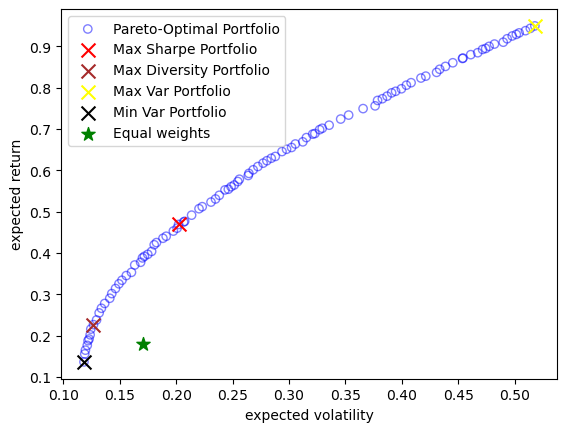

you are doing sharpe
trade data is 2025-03-18 00:00:00
Prices: [212.41145325 211.89179993 125.71765137 322.47094727 391.36999512
 103.51000214 192.82000732 188.10081482  41.65000153 523.14001465
 335.0965271  896.88140869 278.29275513  59.90008163 158.87484741
  99.34999847 200.78999329 162.66999817 160.66999817 551.7800293
 349.57000732 245.3175354  597.9855957  483.95001221 164.25
 233.53155518  69.37999725 460.70999146 820.82751465 529.35040283
 303.6000061  582.35998535  94.72000122 382.81719971 929.97998047
 830.         115.43000031 148.91505432 148.99000549 166.6710968
 152.493927   156.28999329 521.5        225.30999756 177.93197632
 503.79998779 334.2149353   70.72200775  85.14972687 112.60290527]
Stock allocation: [   0.           44.68387146    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            9.81011435    0.            0.            0.
    0.        

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_24252\3963115624.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


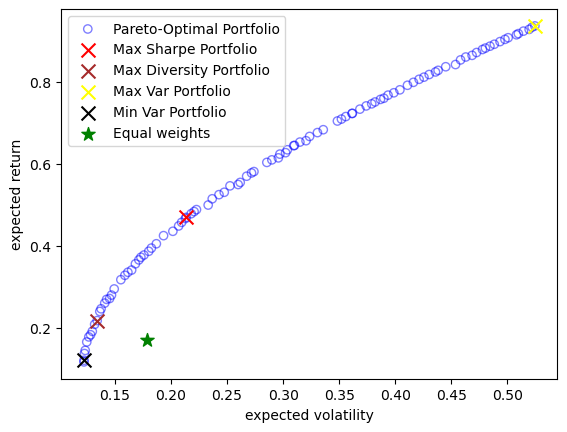

you are doing sharpe
trade data is 2025-04-15 00:00:00
Prices: [201.87527466 176.80000305 126.22000122 288.66000366 350.38000488
  95.29000092 179.58999634 178.94999695  37.99000168 528.16998291
 292.02392578 975.64880371 254.92999268  57.20000076 132.92097473
  85.01000214 185.66999817 158.67999268 156.30999756 507.89001465
 354.10998535 239.10884094 594.08001709 488.26998901 153.61999512
 233.13000488  71.86000061 450.97000122 755.63110352 517.38000488
 312.48001099 521.52001953  78.38999939 385.02316284 976.2800293
 816.5        112.19999695 133.94000244 142.83999634 167.42637634
 160.08999634 138.6000061  441.         254.11000061 149.90112305
 583.59002686 335.25320435  64.18785095  93.74334717 102.15909576]
Stock allocation: [   0.          732.97455822    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            3.57517509    5.48876349    0.            0.
    0.            0.            0.            0.            0.
    0. 

In [47]:
'''
%%time
for config in configurations:
    print(f"\nRunning configuration: {config['name']}")
'''

results = {}
sharpe_portfolio_history = []
calmar_portfolio_history = []
diversity_portfolio_history = []
max_var_portfolio_history = []
min_var_portfolio_history = []
data_size = len(data)

sharpe_current_budget = 1_000_000
sharpe_stock_alloc = np.zeros(len(ticker))  
calmar_current_budget = 1_000_000
calmar_stock_alloc = np.zeros(len(ticker))  
diversity_current_budget = 1_000_000
diversity_stock_alloc = np.zeros(len(ticker))  
max_var_current_budget = 1_000_000
max_var_stock_alloc = np.zeros(len(ticker))  
min_var_current_budget = 1_000_000
min_var_stock_alloc = np.zeros(len(ticker))  

sharpe_budget_history = []
sharpe_stock_alloc_history = []
calmar_budget_history = []
calmar_stock_alloc_history = []
diversity_budget_history = []
diversity_stock_alloc_history = []
max_var_budget_history = []
max_var_stock_alloc_history = []
min_var_budget_history = []
min_var_stock_alloc_history = []

test_period = 250

VaR_confidence = 0.95
hhi_limit = 0.25
# 這裡的 hhi_limit 會影響到多元化的程度，hhi_limit 越小，越分散

for day in range(test_period):    
    print(f"Current day is: {day}")
    serach_day = data_size - (test_period-day)
    current_data = data.iloc[:serach_day] 

    if(day%20 != 0): 
        print("you are doing sharpe")
        record_stock_price(sharpe_stock_alloc, sharpe_current_budget, serach_day, sharpe_budget_history, sharpe_stock_alloc_history)

        print("you are doing diversity")
        record_stock_price(diversity_stock_alloc, diversity_current_budget, serach_day, diversity_budget_history, diversity_stock_alloc_history)

        print("you are doing max_var")
        record_stock_price(max_var_stock_alloc, max_var_current_budget, serach_day, max_var_budget_history, max_var_stock_alloc_history)

        print("you are doing min_var")
        record_stock_price(min_var_stock_alloc, min_var_current_budget, serach_day, min_var_budget_history, min_var_stock_alloc_history)
        continue

    # print(current_data)
    mu = calculate_expected_returns(current_data)
    cov = calculate_covariance_matrix(current_data)
    returns_df = calculate_returns_df_matrix(current_data)
    problem = PortfolioProblem(mu, cov, returns_df, risk_free_rate=0.02, VaR_confidence = VaR_confidence, hhi_limit=hhi_limit)
    # print(current_data)
    
    '''
    algorithm = NSGA2(repair=PortfolioRepair(),
                      sampling = config['sampling'],
                      crossover=config['crossover'])
    '''
    
    algorithm = NSGA2(repair=PortfolioRepair())
    
    
    res = minimize(problem,
                   algorithm,
                   seed=1,
                   verbose=False)
    

    # adding the result
    # results[config['name']] = res


   
    # Get optimal portfolio weights
    X, F, sharpe, calmar, diversity, var = res.opt.get("X", "F", "sharpe", "calmar", "diversity", "var")
    F = F * [1, -1]  # Adjust for minimization/maximization
    
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    # Select portfolio with maximum Sharpe ratio
    max_sharpe_idx = sharpe.argmax()
    # max_calmar_idx = calmar.argmax()
    max_diversity_idx = diversity.argmax()
    max_var_idx = var.argmax()
    min_var_idx = var.argmin()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    # plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe_idx, 0], F[max_sharpe_idx, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    # plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(F[max_diversity_idx, 0], F[max_diversity_idx, 1], marker="x", s=100, color="brown", label="Max Diversity Portfolio")
    plt.scatter(F[max_var_idx, 0], F[max_var_idx, 1], marker="x", s=100, color="yellow", label="Max Var Portfolio")
    plt.scatter(F[min_var_idx, 0], F[min_var_idx, 1], marker="x", s=100, color="black", label="Min Var Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    
    sharpe_optimal_weights = X[max_sharpe_idx]
    # calmar_optimal_weights = X[max_calmar_idx]
    diversity_optimal_weights = X[max_diversity_idx]
    max_var_optimal_weights = X[max_var_idx]
    min_var_optimal_weights = X[min_var_idx]

    # calculate HV
    # HVindex = calculate_HV(F)

    '''
    # Add other indicators (f1, ..., fk) for daily allocation
    additional_indicators = calculate_technical_indicators(current_data)  # Assume this function exists
    final_weights = adjust_weights_with_indicators(optimal_weights, additional_indicators)
    '''


    
    # Make investment with adjusted weights
    print("you are doing sharpe")
    execute_trades(sharpe_stock_alloc, sharpe_optimal_weights, sharpe_current_budget, serach_day, sharpe_budget_history, sharpe_stock_alloc_history)  # Assume this function exists
    

    # print("you are doing calmar")
    # calmar_daily_return = calmar_execute_trades(calmar_stock_alloc, calmar_optimal_weights, calmar_current_budget, serach_day, calmar_budget_history, calmar_stock_alloc_history)  # Assume this function exists
    # calmar_portfolio_history.append(calmar_daily_return)

    print("you are doing diversity")
    execute_trades(diversity_stock_alloc, diversity_optimal_weights, diversity_current_budget, serach_day, diversity_budget_history, diversity_stock_alloc_history)  # Assume this function exists
    
    print("you are doing max_var")
    execute_trades(max_var_stock_alloc, max_var_optimal_weights, max_var_current_budget, serach_day, max_var_budget_history, max_var_stock_alloc_history)  # Assume this function exists

    print("you are doing min_var")
    execute_trades(min_var_stock_alloc, min_var_optimal_weights, min_var_current_budget, serach_day, min_var_budget_history, min_var_stock_alloc_history)  # Assume this function exists
    
    

#### for i in range(len(stock_alloc_history)):
    print(stock_alloc_history[i]) 

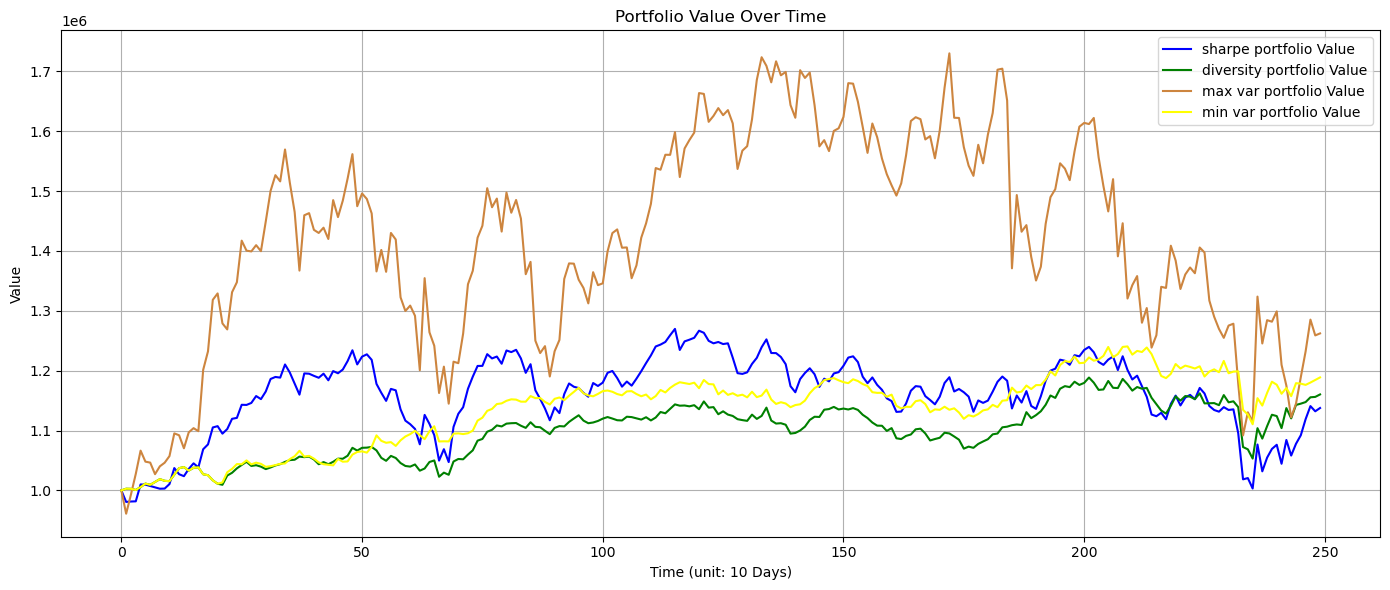

In [52]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(sharpe_budget_history, label="sharpe portfolio Value", color='blue')
#plt.plot(calmar_budget_history, label="calmar Portfolio Value", color='red')
plt.plot(diversity_budget_history, label="diversity portfolio Value", color='green')
plt.plot(max_var_budget_history, label="max var portfolio Value", color='peru')
plt.plot(min_var_budget_history, label="min var portfolio Value", color='yellow')
plt.title("Portfolio Value Over Time")
plt.xlabel("Time (unit: 10 Days)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Compare results
for name, res in results.items():
    print(f"\nThe result of {name} is as follows\n")
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    '''
    # equal weights
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    '''
    x = X[max_sharpe].T

    print("Best Sharpe: \nReturn     = ", x.T @ mu)
    print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))
    print("sharpo ratio = ", (x.T @ mu - 0.02)/(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0)))


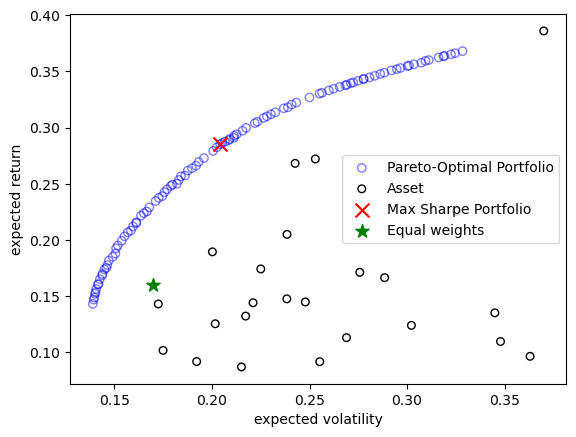

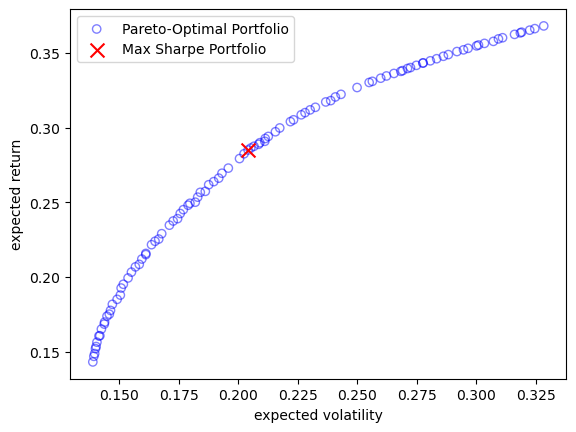

In [52]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [54]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.32297696275160204
META  0.27453075912247143
MSFT  0.1774543857862301
NI    0.10187217354534035
CMCSA 0.06870700223721722
LUV   0.05445871655713892
BAX   0.0
BMY   0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
JPM   0.0
MMC   0.0
MO    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


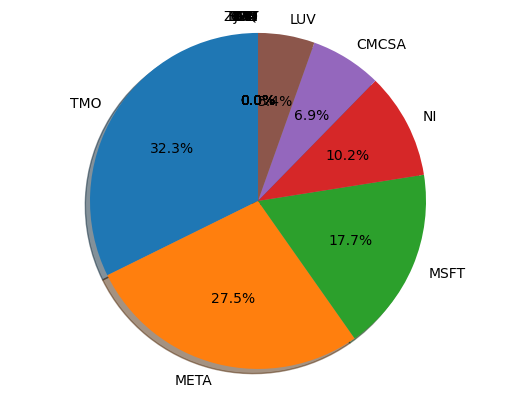

In [56]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [191]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.0933490427723025
Volatility =  0.16460265032746366


In [193]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.019924009576235042
Volatility =  0.48197988245737083


# Solve problem with MOEA/D

In [64]:
import numpy as np
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair

class PortfolioProblem(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(
            n_var=len(mu),
            n_obj=2,
            xl=0.0,
            xu=1.0,
            **kwargs
        )
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk   = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe     = (exp_return - self.risk_free_rate) / exp_risk
        out["F"]   = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

class PortfolioRepair(Repair):
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

# Compute mu, cov from your data
mu  = calculate_expected_returns(current_data)
cov = calculate_covariance_matrix(current_data)

# Problem definition
problem = PortfolioProblem(mu, cov)

# Reference directions for MOEA/D 
ref_dirs = get_reference_directions("uniform", 2, n_partitions=100)

# MOEA/D algorithm setup
algorithm = MOEAD(
    ref_dirs,
    n_neighbors=20,
    prob_neighbor_mating=0.7,
    repair=PortfolioRepair()
)

# Run optimization
res = minimize(problem, algorithm, seed=1, verbose=False)

# Extract and select optimal portfolio
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe_idx = sharpe.argmax()
optimal_weights = X[max_sharpe_idx]

# Hypervolume (optional)
HVindex = calculate_HV(F)


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.022752022831910097


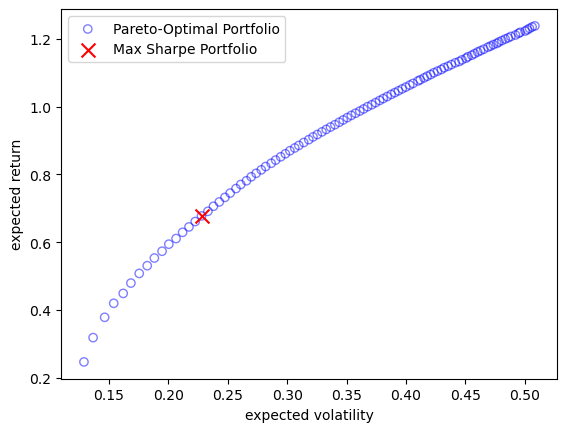

In [65]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

'''
plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()
'''

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()